https://youtu.be/NnE1KVhSyzw

In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn')


In [10]:
# get Microsoft ticker and info
msft = yf.Ticker('msft')
msftInfo = msft.info


In [11]:
# for key,value in msftInfo.items():
#     print('\n%s:' % key)
#     print(value)

# print(msftInfo['sharesOutstanding'])

# print(msft.recommendations)
# print(msft.splits)
# print(msft.major_holders)
# print(msft.institutional_holders)
print(msft.dividends)


Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2021-05-19    0.56
2021-08-18    0.56
2021-11-17    0.62
2022-02-16    0.62
2022-05-18    0.62
Name: Dividends, Length: 74, dtype: float64


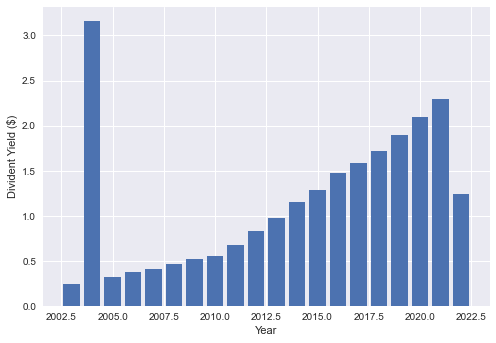

In [12]:
df = msft.dividends
#print(type(df))
# print(df)
data = df.resample('Y').sum()
# print(data)
data = data.reset_index()
# print(data)
data['Year'] = data['Date'].dt.year
# print(data)

# plot it
plt.figure()
plt.bar(data['Year'], data['Dividends'])
plt.ylabel('Divident Yield ($)')
plt.xlabel('Year')
plt.show()
